In [ ]:
import os
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm.auto import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import re
def encontrar_mejor_modelo(base_dir):
    """Busca automáticamente el último checkpoint en la carpeta."""
    if not os.path.exists(base_dir):
        print(f"❌ La carpeta base no existe: {base_dir}")
        return None

    contenido = os.listdir(base_dir)

    # Buscamos carpetas que empiecen con "checkpoint-"
    checkpoints = [d for d in contenido if d.startswith("checkpoint-") and os.path.isdir(os.path.join(base_dir, d))]

    if not checkpoints:
        # Si no hay checkpoints, quizás el modelo está en la raíz (si se guardó con save_model final)
        if "config.json" in contenido:
            print(f"✅ Modelo encontrado en la raíz de: {base_dir}")
            return base_dir
        else:
            print(f"❌ No se encontraron checkpoints ni modelo en: {base_dir}")
            return None

    # Ordenamos por el número del checkpoint (de menor a mayor)
    # Ejemplo: checkpoint-500, checkpoint-664 -> Gana 664
    checkpoints.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    ultimo_checkpoint = checkpoints[-1]

    ruta_final = os.path.join(base_dir, ultimo_checkpoint)
    print(f"✅ Último checkpoint encontrado: {ultimo_checkpoint}")
    return ruta_final

# ==========================================
# ⚙️ CONFIGURACIÓN DINÁMICA
# ==========================================

BASE_CLF_DIR = "/content/drive/MyDrive/StoryWriter/Clasificador/Grueso+fino"

# Buscamos la ruta exacta automáticamente
ruta_modelo_auto = encontrar_mejor_modelo(BASE_CLF_DIR)

if ruta_modelo_auto:
    RUTAS_MODELOS = {
        "Discriminador (Grueso + Fino)": ruta_modelo_auto
    }
else:
    print("⚠️ No se pudo definir la ruta del modelo. Revisa el path base.")
    RUTAS_MODELOS = {}

✅ Último checkpoint encontrado: checkpoint-608


In [ ]:
import os

# Rutas base
BASE_BENCHMARK = "/content/drive/MyDrive/StoryWriter/Data/Benchmark_data"
BASE_MODELOS = "/content/drive/MyDrive/StoryWriter/Clasificador"

print("🔍 --- DIAGNÓSTICO DEL SISTEMA DE ARCHIVOS ---")

# 1. REVISAR LA CARPETA DE BENCHMARK
if os.path.exists(BASE_BENCHMARK):
    print(f"\n✅ La carpeta base de Benchmark EXISTE.")
    contenido = os.listdir(BASE_BENCHMARK)
    print(f"📂 Contenido de Benchmark_data ({len(contenido)} items):")
    for item in sorted(contenido):
        full_path = os.path.join(BASE_BENCHMARK, item)
        if os.path.isdir(full_path):
            num_files = len([f for f in os.listdir(full_path) if f.endswith('.txt')])
            print(f"   └── 📁 '{item}' -> {num_files} archivos .txt")
        else:
            print(f"   └── 📄 {item}")
else:
    print(f"\n❌ ERROR FATAL: No encuentro la carpeta: {BASE_BENCHMARK}")

# 2. REVISAR LA CARPETA DEL CLASIFICADOR (Grueso+Fino)
# Ajusta el nombre si crees que es diferente
path_modelo = os.path.join(BASE_MODELOS, "Grueso")

print(f"\n------------------------------------------------")
print(f"🔍 Revisando carpeta del modelo: '{path_modelo}'")

if os.path.exists(path_modelo):
    print(f"✅ La carpeta del modelo EXISTE.")
    archivos_modelo = os.listdir(path_modelo)
    print(f"📂 Archivos encontrados dentro:")
    for f in archivos_modelo:
        print(f"   - {f}")

    # Chequeo de subcarpetas (común en Hugging Face Trainers)
    subcarpetas = [f for f in archivos_modelo if os.path.isdir(os.path.join(path_modelo, f))]
    if subcarpetas:
        print(f"\n⚠️ ¡ATENCIÓN! Hay subcarpetas. ¿Quizás el modelo está en una de estas?")
        for sub in subcarpetas:
            print(f"   └── 📁 {sub} (Probable checkpoint)")
else:
    print(f"❌ La carpeta del modelo NO EXISTE en esa ruta exacta.")
    print(f"   Carpetas disponibles en '{BASE_MODELOS}':")
    try:
        print(os.listdir(BASE_MODELOS))
    except:
        print("   (No puedo leer la carpeta padre)")

🔍 --- DIAGNÓSTICO DEL SISTEMA DE ARCHIVOS ---

✅ La carpeta base de Benchmark EXISTE.
📂 Contenido de Benchmark_data (8 items):
   └── 📁 '.ipynb_checkpoints' -> 0 archivos .txt
   └── 📁 'control_negativo_fino' -> 21 archivos .txt
   └── 📁 'control_negativo_grueso' -> 40 archivos .txt
   └── 📁 'control_positivo' -> 41 archivos .txt
   └── 📁 'mistral_base' -> 20 archivos .txt
   └── 📁 'mistral_base_prompt_pro' -> 20 archivos .txt
   └── 📁 'mistral_finetune' -> 20 archivos .txt
   └── 📁 'mistral_finetune_prompt_pro' -> 20 archivos .txt

------------------------------------------------
🔍 Revisando carpeta del modelo: '/content/drive/MyDrive/StoryWriter/Clasificador/Grueso'
✅ La carpeta del modelo EXISTE.
📂 Archivos encontrados dentro:
   - runs
   - checkpoint-456
   - config.json
   - model.safetensors
   - tokenizer_config.json
   - special_tokens_map.json
   - vocab.json
   - merges.txt
   - tokenizer.json
   - training_args.bin

⚠️ ¡ATENCIÓN! Hay subcarpetas. ¿Quizás el modelo está en u

In [ ]:
BASE_DIR = "/content/drive/MyDrive/StoryWriter/Data/Benchmark_data"

# ¡CORRECCIÓN AQUÍ! Agregué el espacio en 'mistral_finetune '
TARGET_FOLDERS = [
    'control_positivo',
    'control_negativo_fino',
    'control_negativo_grueso',
    'mistral_base',
    'mistral_base_prompt_pro',
    'mistral_finetune',
    'mistral_finetune_prompt_pro'
]

# Asegurate de que estas rutas son las correctas
RUTAS_MODELOS = {
    "Discriminador (Solo Grueso)": "/content/drive/MyDrive/StoryWriter/Clasificador/Grueso",
    "Discriminador (Grueso + Fino)": "/content/drive/MyDrive/StoryWriter/Clasificador/Grueso+fino/checkpoint-608",
}

BATCH_SIZE = 32
MAX_LENGTH = 512

In [ ]:
def get_txt_files(folder_path):
    # Intentamos corregir el path si termina en 'd' y la carpeta original no
    if not os.path.exists(folder_path):
        # Por si el path es 'mistral_finetune' y el folder es 'mistral_finetuned'
        alternate_path = folder_path + 'd'
        if os.path.exists(alternate_path):
            folder_path = alternate_path

    if not os.path.exists(folder_path):
        return []

    return [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".txt")]

def evaluar_dataset(model, tokenizer, file_paths, device):
    if not file_paths: return 0.0

    # ... (El cuerpo de esta función se mantiene igual, ya que solo hace inferencia)
    positivos = 0
    total = len(file_paths)

    for i in tqdm(range(0, total, BATCH_SIZE), leave=False):
        batch_files = file_paths[i : i + BATCH_SIZE]
        texts = []
        for fp in batch_files:
            try:
                with open(fp, 'r', encoding='utf-8', errors='ignore') as f:
                    texts.append(f.read())
            except:
                continue

        if not texts: continue

        inputs = tokenizer(texts, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1)
            positivos += preds.sum().item()

    return (positivos / total) * 100

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
all_results = []

print(f"Iniciando evaluación en {device}...")

for model_name, model_path in RUTAS_MODELOS.items():
    print(f"\n🤖 Cargando modelo: {model_name}...")

    # ❗️ CHEQUEO DE PATH Y ARCHIVOS ❗️
    if not os.path.exists(model_path):
        print(f"❌ ERROR: La ruta no existe: {model_path}. Por favor, verifica el nombre exacto.")
        continue

    try:
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        # Forzar el uso de safetensors para evitar el error de archivo
        model = AutoModelForSequenceClassification.from_pretrained(
            model_path,
            use_safetensors=True
        ).to(device)
        model.eval()
    except Exception as e:
        print(f"❌ Error cargando {model_name}: {e}")
        print("   -> Si el error persiste, reinicia el Kernel y vuelve a montar Drive.")
        continue

    print(f"   Evaluando carpetas...")
    for folder_name in TARGET_FOLDERS:
        full_path = os.path.join(BASE_DIR, folder_name)
        files = get_txt_files(full_path)

        # Corrección de nombre de carpeta de benchmark
        if len(files) == 0 and folder_name == 'mistral_finetune':
             full_path = os.path.join(BASE_DIR, 'mistral_finetuned') # Intentar la versión con 'd'
             files = get_txt_files(full_path)
             if len(files) > 0:
                 folder_name = 'mistral_finetuned' # Actualizar nombre si se encuentra
                 print(f"   ✅ Advertencia: Se usó el nombre alternativo: {folder_name}")


        if len(files) == 0:
            print(f"   ⚠️ Carpeta vacía o no existe: {folder_name}")
            score = 0
        else:
            score = evaluar_dataset(model, tokenizer, files, device)

        print(f"   -> {folder_name}: {score:.2f}% Shakespeare ({len(files)} muestras)")

        all_results.append({
            "Dataset": folder_name,
            "Modelo": model_name,
            "Score_Shakespeare": score
        })

Iniciando evaluación en cuda...

🤖 Cargando modelo: Discriminador (Solo Grueso)...
   Evaluando carpetas...


  0%|          | 0/2 [00:00<?, ?it/s]

   -> control_positivo: 100.00% Shakespeare (41 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> control_negativo_fino: 100.00% Shakespeare (21 muestras)


  0%|          | 0/2 [00:00<?, ?it/s]

   -> control_negativo_grueso: 20.00% Shakespeare (40 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_base: 10.00% Shakespeare (20 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_base_prompt_pro: 55.00% Shakespeare (20 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_finetune: 10.00% Shakespeare (20 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_finetune_prompt_pro: 80.00% Shakespeare (20 muestras)

🤖 Cargando modelo: Discriminador (Grueso + Fino)...
   Evaluando carpetas...


  0%|          | 0/2 [00:00<?, ?it/s]

   -> control_positivo: 100.00% Shakespeare (41 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> control_negativo_fino: 0.00% Shakespeare (21 muestras)


  0%|          | 0/2 [00:00<?, ?it/s]

   -> control_negativo_grueso: 0.00% Shakespeare (40 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_base: 10.00% Shakespeare (20 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_base_prompt_pro: 60.00% Shakespeare (20 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_finetune: 10.00% Shakespeare (20 muestras)


  0%|          | 0/1 [00:00<?, ?it/s]

   -> mistral_finetune_prompt_pro: 70.00% Shakespeare (20 muestras)



RESULTADOS FINALES (% Clasificado como Shakespeare)


Modelo,Discriminador (Grueso + Fino),Discriminador (Solo Grueso)
Dataset,,
control_negativo_fino,0.0,100.0
control_negativo_grueso,0.0,20.0
control_positivo,100.0,100.0
mistral_base,10.0,10.0
mistral_base_prompt_pro,60.0,55.0
mistral_finetune,10.0,10.0
mistral_finetune_prompt_pro,70.0,80.0


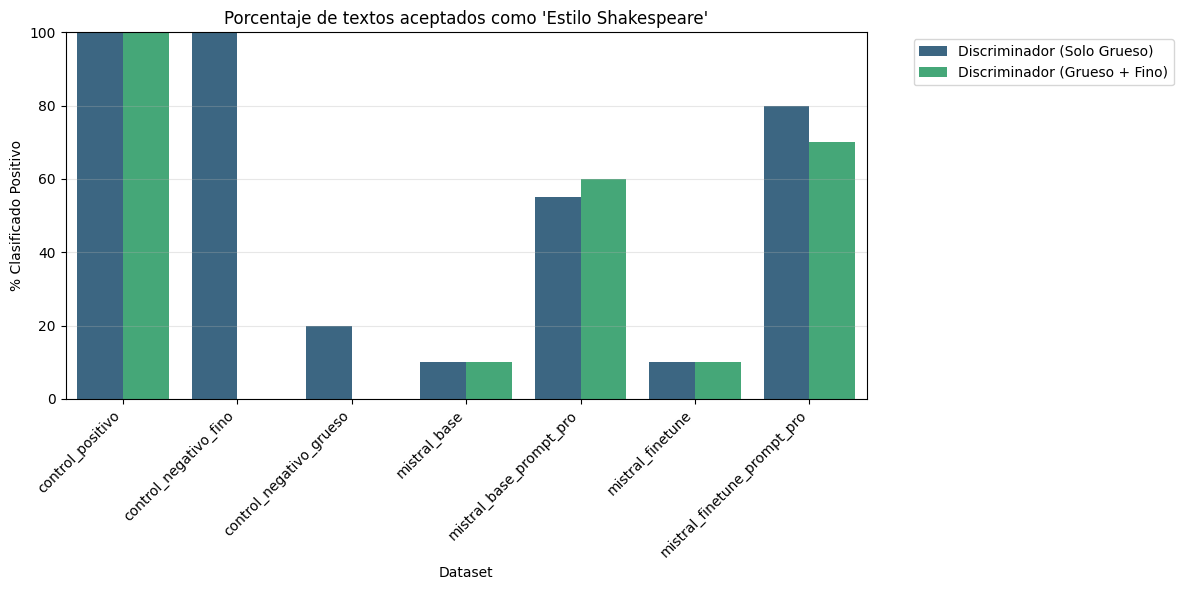

In [ ]:
if all_results:
    df = pd.DataFrame(all_results)

    # Tabla pivote
    pivot = df.pivot(index="Dataset", columns="Modelo", values="Score_Shakespeare")
    print("\n" + "="*50)
    print("RESULTADOS FINALES (% Clasificado como Shakespeare)")
    print("="*50)
    display(pivot)

    # Gráfico de barras
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x="Dataset", y="Score_Shakespeare", hue="Modelo", palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title("Porcentaje de textos aceptados como 'Estilo Shakespeare'")
    plt.ylabel("% Clasificado Positivo")
    plt.ylim(0, 100)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()